In [3]:
import pandas as pd
import numpy as np
import re
import nltk

from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv("input/split_train.csv")
x_train=train.drop('target',axis=1)#dataframe with index
y_train=train.target

test=pd.read_csv("input/dev.csv")
x_test=test.drop('target',axis=1)#dataframe with index
y_test=test.target

tweettoken = TweetTokenizer(strip_handles=True, reduce_len=True) # word segmentation
stemmer=PorterStemmer() # stemming

In [5]:
train_pre=[]
test_pre=[]
def preprocess(t,kpc):
    url = re.compile(r'https?://\S+|www\.\S+')
    tee=url.sub(r'',t)
    tee=re.sub('[^a-zA-Z]'," ",tee)
    tee=tee.lower()
    res=tweettoken.tokenize(tee)
    for i in res:
        if i in stopwords.words('english'):
            res.remove(i)
    rest=[]
    for k in res:
        rest.append(stemmer.stem(k))
    ret=" ".join(rest)
    if kpc==1:
        train_pre.append(ret)
    elif kpc==0:
        test_pre.append(ret)

def splitpro(t,q,m):
         for j in range(q):
                 preprocess(t["text"].iloc[j],m)
                 
splitpro(x_train,5329,1)
splitpro(x_test,2284,0)

In [6]:
train_pre[:10]

['ash australia collaps trent bridg among worst histori england bundl australia',
 'great michigan techniqu camp b g thank bmurph hail youtsey termn r goblu wrestleon',
 'cnn tennesse movi theater shoot suspect kill polic',
 'still riot a coupl hour left i to up class',
 'crack the path i wipe thi morn beach run surfac wound left elbow right knee',
 'expert franc begin examin airplan debri found reunion island french air accid expert mlb',
 'came kill indian fun video smirk remorseless pakistani killer show boast',
 'johnsontionn except idk it realli burn',
 'destroy hous',
 'polic offic wound suspect dead exchang shot']

In [7]:
type(train_pre)

list

### Question d: Bag of Words model 

description: use bag of words model for text vectorization

d-1: build the bag of words feature vectors for both the train and dev sets, and report the total number of features in these vectors.

- answer: total number of features = 2991.
- codes: see the codes and results in **Cell [4], [5]**.

d-2: decide on an appropriate threshold M , and discuss how you made this decision.

- answer: best threshold M=3. To decide on the best M, I use F1 Score to be the metric, i.e., the value that leads to the highest F1 Score is my best M. I set the value of M from 1 to 10 and run each of the four classification models respectively. Results show that when M=3, the Bernoulli Naive Bayes model gets the highest F1 Score (0.7611518915866743) among all models. 
- codes: see codes and results in **Cell [15], [16], [17], [18]**.

In [4]:
# d-1: use bag of words model on train set.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=3,
                             binary=True) #instantiate the CountVectorizer class, set M=3
train_corpus = train_pre

train_bow_vectors = vectorizer.fit_transform(train_corpus) #use fit() to create index, transform each document into a word frequency vector
print(type(train_bow_vectors)) #type: sparse vector
#print (train_bow_vectors)

train_bow_vectors = train_bow_vectors.toarray()
print (train_bow_vectors)
print(type(train_bow_vectors)) #type: np array

train_bow_voca_list = vectorizer.get_feature_names() #generate corpus into a vocabulary list
train_bow_voca_dic = vectorizer.vocabulary_
print(train_bow_voca_list[:50])
print(list(train_bow_voca_dic.items())[:50])
#print('vocabulary list of trainset:', train_bow_voca_list)
#print( 'vocabulary dic of trainset:', train_bow_voca_dic)

print(train_bow_vectors.sum(axis=0)) #count each word' frequency in the corpus

X1 = train_bow_vectors.shape
print (X1)
train_bow_feature_num = X1[1] #vector length/number of features
print ('total number of features in trainset:', train_bow_feature_num)

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
['aa', 'aba', 'abandon', 'abbswinston', 'abc', 'abcnew', 'abil', 'abl', 'ablaz', 'about', 'absolut', 'abstorm', 'abus', 'accept', 'access', 'accid', 'accident', 'accionempresa', 'accord', 'account', 'accus', 'achiev', 'acid', 'acr', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'address', 'admit', 'adopt', 'adult', 'advanc', 'advisori', 'af', 'affect', 'affili', 'afghan', 'afghanistan', 'afp', 'afraid', 'africa', 'after', 'afternoon', 'aftershock', 'ag', 'again']
[('ash', 169), ('australia', 192), ('collaps', 532), ('trent', 2721), ('bridg', 355), ('among', 99), ('worst', 2941), ('histori', 1240), ('england', 859), ('bundl', 381), ('great', 1140), ('michigan', 1652), ('techniqu', 2592), ('camp', 408), ('thank', 2617), ('hail', 1171), ('cnn', 523), ('tennesse', 2602), ('movi', 1714), ('theater',

In [5]:
# d-1: use bag of words model on dev set.

test_corpus = test_pre

test_bow_vectors = vectorizer.transform(test_corpus) #use the same set of tokens as trainset, transform each document into a word frequency vector
print(type(test_bow_vectors)) #type: sparse vector
#print (test_bow_vectors)

test_bow_vectors = test_bow_vectors.toarray()
print (test_bow_vectors)
print(type(test_bow_vectors)) #type: np array

test_bow_voca_list = vectorizer.get_feature_names() #generate corpus into a vocabulary list
test_bow_voca_dic = vectorizer.vocabulary_
print(test_bow_voca_list[:50])
print(list(test_bow_voca_dic.items())[:50])
#print('vocabulary list of dev set:', test_bow_voca_list)
#print( 'vocabulary dic of dev set:', test_bow_voca_dic)

print(test_bow_vectors.sum(axis=0)) #count each word' frequency in the corpus

X2 = test_bow_vectors.shape
print (X2)
test_bow_feature_num = X2[1] #vector length/number of features
print ('total number of features in dev set:', test_bow_feature_num)

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
['aa', 'aba', 'abandon', 'abbswinston', 'abc', 'abcnew', 'abil', 'abl', 'ablaz', 'about', 'absolut', 'abstorm', 'abus', 'accept', 'access', 'accid', 'accident', 'accionempresa', 'accord', 'account', 'accus', 'achiev', 'acid', 'acr', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'address', 'admit', 'adopt', 'adult', 'advanc', 'advisori', 'af', 'affect', 'affili', 'afghan', 'afghanistan', 'afp', 'afraid', 'africa', 'after', 'afternoon', 'aftershock', 'ag', 'again']
[('ash', 169), ('australia', 192), ('collaps', 532), ('trent', 2721), ('bridg', 355), ('among', 99), ('worst', 2941), ('histori', 1240), ('england', 859), ('bundl', 381), ('great', 1140), ('michigan', 1652), ('techniqu', 2592), ('camp', 408), ('thank', 2617), ('hail', 1171), ('cnn', 523), ('tennesse', 2602), ('movi', 1714), ('theater',

### Question e: Implement a naive Bayes classifier - BernoulliNB Naive Bayes

e-1: implement the BernoulliNB Naive Bayes classifier, without using any existing machine learning libraries. 

- codes: see the codes in **Cell [6]**.

e-2: Train this classifier on the train set, and report its mean F 1-score on the dev set.

- codes: see the codes and results in **Cell [7]**.

In [6]:
# e-1: implement the BernoulliNB Naive Bayes classifier, without using any existing machine learning libraries.

import numpy as np

class Bernoulli_NaiveBayes:

    def __init__(self):   
        self.alpha = 1 # set smoothing factor=1(Laplace Smoothing), to avoid zero probability problems  

    def _cal_prior_prob_log(self, y, classes): # calculate the logarithm of prior probability of each class, P(y=c_k)
        self.classes = np.unique(y)
        class_num = len(self.classes) #count the number of possible types of y
        sample_num = len(y)
        
        c_num = np.count_nonzero(y == classes[:, None], axis=1) #count sample amount of each class
        prior_prob = (c_num + self.alpha) / (sample_num + class_num * self.alpha) #calculate prior probabilities(add smoothing correction)
        prior_prob_log = np.log(prior_prob) #calculate logarithm
        
        return prior_prob_log
    
    def _cal_condi_prob_log(self, X, y, classes): #calculate the logarithm of all conditional probabilities P(x^(j)|y=c_k)
        
        n = (X.shape)[1]
        K = len(classes)
        
        #create an empty multidimensional array
        #prob_log: logarithmic matrix of two conditional probabilities
        condi_prob_log = np.empty((2, K, n)) 
        
        for k, c in enumerate(classes):
            X_c = X[np.equal(y, c)] #acquire all samples of class c_k
            total_num = len(X_c)
            num_f1 = np.count_nonzero(X_c, axis=0) #count the number of samples of which feature value is 1
            condi_prob_f1 = (num_f1 + self.alpha) / (total_num + self.alpha * 2) #calculate conditional probability P(x^(j)=1|y=c_k)
            
            #calculate and store logarithm into matrix
            #prob_log[0]: store all values of log(P(x^(j)=0|y=c_k))
            #prob_log[1]: store all values of log(P(x^(j)=1|y=c_k))
            condi_prob_log[0, k] = np.log(1 - condi_prob_f1) 
            condi_prob_log[1, k] = np.log(condi_prob_f1) 
            
        return condi_prob_log
   
    def train(self, x_train, y_train): #train the model
        self.classes = np.unique(y_train) #acquire all classes  
        self.prior_prob_log = self._cal_prior_prob_log(y_train, self.classes) #calculate and store the logarithm of all prior probabilities
        self.condi_prob_log = self._cal_condi_prob_log(x_train, y_train, self.classes) #calculate and store the logarithm of all conditional probabilities

    def _predict_single_sample(self, x): #predict the label of single sample

        K = len(self.classes)
        po_prob_log = np.empty(K) #create an empty multidimensional array
        
        index_f1 = x == 1 #acquire index of feature value=1 
        index_f0 = ~index_f1 #acquire index of feature value=0

        for k in range(K): #iterate each class
            #calculate the logarithm of the numerator of the posterior probability
            po_prob_log[k] = self.prior_prob_log[k] \
                                + np.sum(self.condi_prob_log[0, k][index_f0]) \
                                + np.sum(self.condi_prob_log[1, k][index_f1])

        label = np.argmax(po_prob_log) #get the class with the highest posterior probability
        return label

    def predict(self, X): #predict samples (include single sample)
        
        if X.ndim == 1: #if only predict single sample (the dimension of the array = 1), invoke _predict_single_sample()
            return self._predict_single_sample(X) 
        else:
            #if predict multiple samples, loop call _predict_single_sample() and return a list of the predicted results 
            labels = []
            for j in range(X.shape[0]):
                label = self._predict_single_sample(X[j])
                labels.append(label)
            return labels
        
    def cal_f1_score(self,true,predict):
        
        true = list(true)
        num = len(true)
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        
        for i in range(num):               
            if true[i] != predict[i]:
                if true[i] == 1:
                    FN += 1
                else:
                    FP += 1
            else:
                if true[i] == 1:
                    TP += 1
                else:
                    TN += 1

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        F1_Score = 2 * (precision * recall) / (precision + recall)
        return F1_Score

In [7]:
# e-2: Train the Bernoulli_NaiveBayes classifier on the train set, and report its mean F 1-score on the dev set.

x_train = train_bow_vectors
y_train = np.array(y_train)
x_test = test_bow_vectors

BernoulliNB = Bernoulli_NaiveBayes()
BernoulliNB.train(x_train,y_train)
y_pred = BernoulliNB.predict(x_test)

print (BernoulliNB.cal_f1_score(y_test,y_pred))

0.7611518915866743


### Question i: N-gram model

description: use N-gram model for text vectorization

i-1: Using N = 2, construct feature representations of the tweets in the train and dev tweets.

- answer: total number of features = 4849.
- codes: see the codes and results in **Cell [8], [9]**.

i-2: Randomly sample 10 2-grams from your vocabulary, and print them out. 

- codes: see the codes and results in **Cell [10]**.

i-3: Choose a threshold M, and only include symbols in the vocabulary that occur in at least M different tweets in the train set. Discuss how you chose the threshold M.

- answer: best threshold M=3. To decide on the best M, I use F1 Score to be the metric, i.e., the value that leads to the highest F1 Score is my best M. I set the value of M from 1 to 10 and run each of the four classification models respectively. Results show that when M=3, the Non-linear SVM model gets the highest F1 Score (0.7555040556199305) among all models. 
- codes: see the codes and results in **Cell [19], [20], [21], [22]**.

i-4: Repeat parts (e)-(h), and report the results. 

- codes: see the codes and results in **Cell [11], [12], [13], [14]**.

i-5: Do these results differ significantly from those using the bag of words model? Discuss what this implies about the task.

- answer: According to the results printed in Cell [15]~[22], the F1 scores of using the N-gram model are generally slightly lower than those using the bag of words model. The range of this difference is not significantly large, not greater than 0.04. This implies that Bag of Words model and N-gram model have similar performance on this short text classification task.

In [8]:
# i-1: use N-gram model (N=2) on train set.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=3,
                             ngram_range=(1,2),
                             binary=True) #instantiate the CountVectorizer class, set M=3

train_corpus = train_pre
train_ng_vectors = vectorizer.fit_transform(train_corpus) #use fit() to create index,transform each document into a word frequency vector
print(type(train_ng_vectors)) #type: sparse vector
#print (train_ng_vectors)

train_ng_vectors = train_ng_vectors.toarray()
print (train_ng_vectors)
print(type(train_ng_vectors)) #type: np array

train_ng_voca_list = vectorizer.get_feature_names() #generate corpus into a vocabulary list
train_ng_voca_dic = vectorizer.vocabulary_
print(train_ng_voca_list[:50])
print(list(train_ng_voca_dic.items())[:50])
#print('vocabulary list of trainset:', train_ng_voca_list)
#print( 'vocabulary dic of trainset:', train_ng_voca_dic)

print(train_ng_vectors.sum(axis=0)) #count each word' frequency in the corpus

X3 = train_ng_vectors.shape
print (X3)
train_ng_feature_num = X3[1] #vector length/number of features
print ('total number of features in trainset:', train_ng_feature_num)

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
['aa', 'aba', 'aba woman', 'abandon', 'abandon aircraft', 'abbswinston', 'abbswinston zionist', 'abc', 'abc news', 'abcnew', 'abil', 'abl', 'ablaz', 'about', 'absolut', 'abstorm', 'abus', 'accept', 'access', 'access the', 'accid', 'accid expert', 'accid indian', 'accid man', 'accid properti', 'accident', 'accionempresa', 'accord', 'account', 'account hiroshima', 'accus', 'achiev', 'acid', 'acr', 'across', 'act', 'action', 'action hostag', 'action year', 'activ', 'activ municip', 'actual', 'ad', 'ad video', 'add', 'address', 'admit', 'admit arson', 'adopt', 'adult']
[('ash', 252), ('australia', 287), ('collaps', 820), ('trent', 4372), ('bridg', 547), ('among', 135), ('worst', 4752), ('histori', 1944), ('england', 1312), ('bundl', 585), ('ash australia', 253), ('australia collaps', 288), ('collaps trent', 824

In [9]:
# i-1: use N-gram model (N=2) on dev set.

test_corpus = test_pre
test_ng_vectors = vectorizer.transform(test_corpus) #use the same set of tokens as trainset, transform each document into a word frequency vector
print(type(test_ng_vectors)) #type: sparse vector
#print (test_ng_vectors)

test_ng_vectors = test_ng_vectors.toarray()
print (test_ng_vectors)
print(type(test_ng_vectors)) #type: np array

test_ng_voca_list = vectorizer.get_feature_names() #generate corpus into a vocabulary list
test_ng_voca_dic = vectorizer.vocabulary_
print(test_ng_voca_list[:50])
print(list(test_ng_voca_dic.items())[:50])
#print('vocabulary list of trainset:', test_ng_voca_list)
#print( 'vocabulary dic of trainset:', test_ng_voca_dic)

print(test_ng_vectors.sum(axis=0)) #count each word' frequency in the corpus

X4 = test_ng_vectors.shape
print (X4)
test_ng_feature_num = X4[1] #vector length/number of features
print ('total number of features in dev set:', test_ng_feature_num)

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
['aa', 'aba', 'aba woman', 'abandon', 'abandon aircraft', 'abbswinston', 'abbswinston zionist', 'abc', 'abc news', 'abcnew', 'abil', 'abl', 'ablaz', 'about', 'absolut', 'abstorm', 'abus', 'accept', 'access', 'access the', 'accid', 'accid expert', 'accid indian', 'accid man', 'accid properti', 'accident', 'accionempresa', 'accord', 'account', 'account hiroshima', 'accus', 'achiev', 'acid', 'acr', 'across', 'act', 'action', 'action hostag', 'action year', 'activ', 'activ municip', 'actual', 'ad', 'ad video', 'add', 'address', 'admit', 'admit arson', 'adopt', 'adult']
[('ash', 252), ('australia', 287), ('collaps', 820), ('trent', 4372), ('bridg', 547), ('among', 135), ('worst', 4752), ('histori', 1944), ('england', 1312), ('bundl', 585), ('ash australia', 253), ('australia collaps', 288), ('collaps trent', 824

In [10]:
# i-2: Randomly sample 10 2-grams from your vocabulary, and print them out. 

import random 

slice = []
for word in random.sample(test_ng_voca_list,100):
    if bool(' ' in word) == True:
        slice.append(word)
        if len(slice) == 10:
            break
print (slice)

['get destroy', 'evacu order', 'take wht', 'you go', 'hurrican drought', 'plan hijack', 'lightn caus', 'buse arrest', 'crash there', 'saw coach']


In [11]:
# i-4: use N-gram model, repeat parts (e)-(h), and report the results.

# 1.Bernoulli NaiveBayes model
y_train = np.array(y_train)
BernoulliNB = Bernoulli_NaiveBayes()
BernoulliNB.train(train_ng_vectors,y_train)
y_pred = BernoulliNB.predict(test_ng_vectors)
print (BernoulliNB.cal_f1_score(y_test,y_pred))

0.7282809611829946


In [12]:
# i-4: use N-gram model, repeat parts (e)-(h), and report the results.

# 2.LR model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

LR = LogisticRegression()
LR.fit(train_ng_vectors,y_train)
predict_lr=LR.predict(test_ng_vectors)
print(f1_score(y_test,predict_lr))

0.7546346782988005


In [13]:
# i-4: use N-gram model, repeat parts (e)-(h), and report the results.

# 3.Linear SVM model
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

lsvm_model=LinearSVC(C=0.1)
lsvm_model.fit(train_ng_vectors,y_train)
predict_lsvm=lsvm_model.predict(test_ng_vectors)
print(f1_score(y_test,predict_lsvm))

0.7526055951727921


In [14]:
# i-4: use N-gram model, repeat parts (e)-(h), and report the results.

# 4.Non-linear SVM model
from sklearn.svm import SVC
from sklearn.metrics import f1_score

SVM=SVC(C=1,kernel='rbf',gamma=0.1)
SVM.fit(train_ng_vectors,y_train)
predict_svm=SVM.predict(test_ng_vectors)
print(f1_score(y_test,predict_svm))

0.7555040556199305


[0.758169934640523, 0.754880694143167, 0.7516198704103672, 0.7473118279569891, 0.7453954496208018, 0.7460747157552788, 0.749055585536967, 0.7455236028214868, 0.7475516866158868, 0.7463175122749591]
Max F1 Score = 0.758169934640523
best threshold M = 1


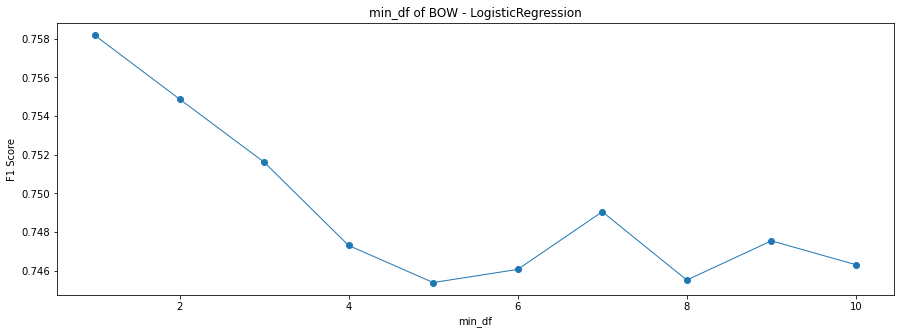

In [15]:
# d-2: Decide on an appropriate threshold M for Bag of Words Model.

# 1.min_df of BOW - LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))

for m in m_list:
    vectorizer = CountVectorizer(min_df=m,binary=True) 
    train_bow_vectors = vectorizer.fit_transform(train_corpus) 
    train_bow_vectors = train_bow_vectors.toarray()    
    test_corpus = test_pre
    test_bow_vectors = vectorizer.transform(test_corpus) 
    test_bow_vectors = test_bow_vectors.toarray()
    
    LR = LogisticRegression()
    LR.fit(train_bow_vectors,y_train)
    predict_lr=LR.predict(test_bow_vectors)
    
    f1 = f1_score(y_test,predict_lr)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=1
#plot
a1 = m_list
b1 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a1,b1,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of BOW - LogisticRegression") 
plt.show() 

[0.7562841530054644, 0.7562841530054644, 0.7487738419618528, 0.7486457204767064, 0.7494553376906319, 0.747276688453159, 0.7448200654307524, 0.7448200654307524, 0.7465790914066777, 0.7458745874587459]
Max F1 Score = 0.7562841530054644
best threshold M = 1


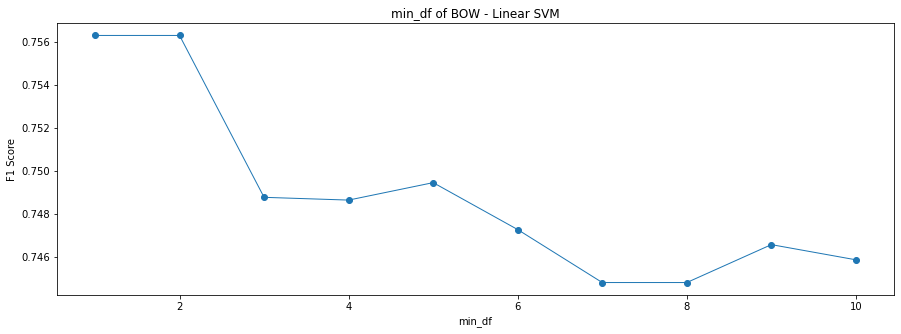

In [16]:
# d-2: Decide on an appropriate threshold M for Bag of Words Model.

# 2.min_df of BOW - Linear SVM

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))

for m in m_list:
    vectorizer = CountVectorizer(min_df=m,binary=True) 
    train_bow_vectors = vectorizer.fit_transform(train_corpus) 
    train_bow_vectors = train_bow_vectors.toarray()
    test_corpus = test_pre
    test_bow_vectors = vectorizer.transform(test_corpus) 
    test_bow_vectors = test_bow_vectors.toarray()
    
    lsvm_model=LinearSVC(C=0.1)
    lsvm_model.fit(train_bow_vectors,y_train)
    predict_lsvm=lsvm_model.predict(test_bow_vectors)
    
    f1 = f1_score(y_test,predict_lsvm)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=1
#plot
a2 = m_list
b2 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a2,b2,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of BOW - Linear SVM") 
plt.show() 

[0.7560414269275029, 0.7583098591549297, 0.7611518915866743, 0.7542468856172139, 0.7494331065759636, 0.7473026689381034, 0.7416240772288472, 0.7411630558722919, 0.7349742415569548, 0.7393526405451448]
Max F1 Score = 0.7611518915866743
best threshold M = 3


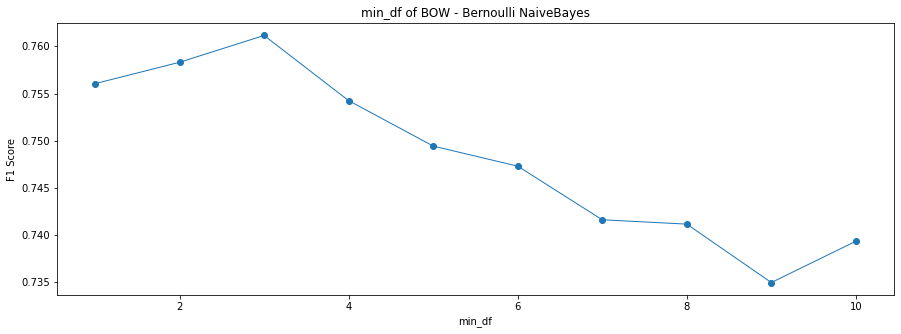

In [17]:
# d-2: Decide on an appropriate threshold M for Bag of Words Model.

# 3.min_df of BOW - Bernoulli NaiveBayes

from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))

for m in m_list:
    vectorizer = CountVectorizer(min_df=m,binary=True) 
    train_bow_vectors = vectorizer.fit_transform(train_corpus) 
    train_bow_vectors = train_bow_vectors.toarray()
    test_corpus = test_pre
    test_bow_vectors = vectorizer.transform(test_corpus) 
    test_bow_vectors = test_bow_vectors.toarray()
            
    BernoulliNB = Bernoulli_NaiveBayes()
    BernoulliNB.train(train_bow_vectors,y_train)
    y_pred = BernoulliNB.predict(test_bow_vectors)
    
    f1 = BernoulliNB.cal_f1_score(y_test,y_pred)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=3
#plot
a2 = m_list
b2 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a2,b2,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of BOW - Bernoulli NaiveBayes") 
plt.show() 

[0.7457428068115091, 0.7534562211981567, 0.752441125789776, 0.7505747126436781, 0.7556066705002876, 0.7501435956346928, 0.7484240687679083, 0.7502876869965478, 0.7410404624277457, 0.7442396313364056]
Max F1 Score = 0.7556066705002876
best threshold M = 5


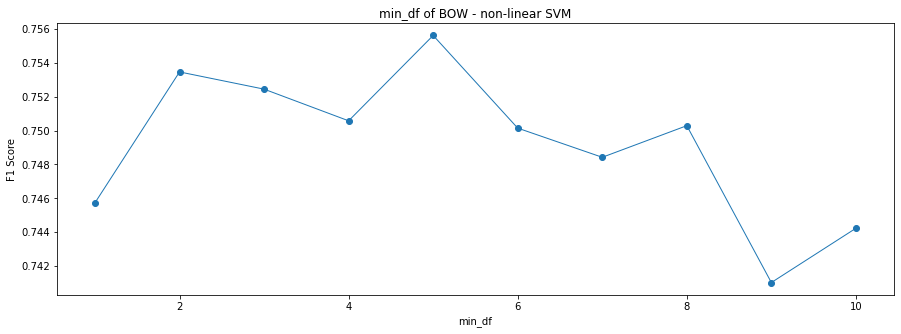

In [18]:
# d-2: Decide on an appropriate threshold M for Bag of Words Model.

# 4.min_df of BOW - non-linear SVM

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))
 
for m in m_list:
    vectorizer = CountVectorizer(min_df=m,binary=True) 
    train_bow_vectors = vectorizer.fit_transform(train_corpus) 
    train_bow_vectors = train_bow_vectors.toarray()
    test_corpus = test_pre
    test_bow_vectors = vectorizer.transform(test_corpus) 
    test_bow_vectors = test_bow_vectors.toarray()
        
    SVM=SVC(C=1,kernel='rbf',gamma=0.1)
    SVM.fit(train_bow_vectors,y_train)
    predict_svm=SVM.predict(test_bow_vectors)
    
    f1 = f1_score(y_test,predict_svm)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=5
#plot
a4 = m_list
b4 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a4,b4,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of BOW - non-linear SVM") 
plt.show() 

[0.7527964205816554, 0.7513751375137514, 0.7546346782988005, 0.7480832420591457, 0.748768472906404, 0.7449481157837247, 0.7471575527883053, 0.7479674796747968, 0.7464788732394366, 0.7512301804264625]
Max F1 Score = 0.7546346782988005
best threshold M = 3


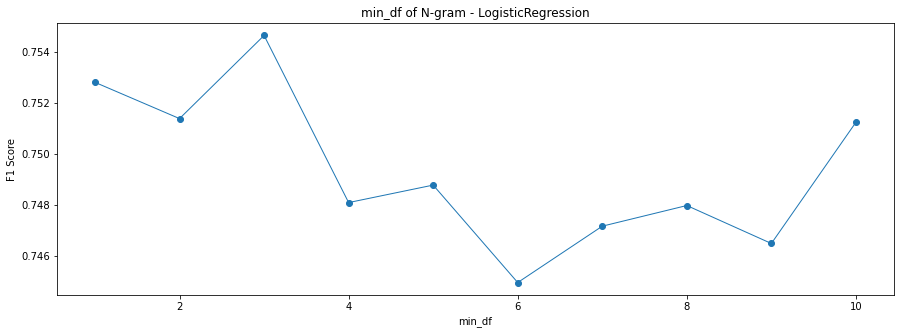

In [19]:
# i-3: Decide on an appropriate threshold M for N-gram Model

# 1.min_df of N-gram - LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))

for m in m_list:
    vectorizer = CountVectorizer(min_df=m,ngram_range=(1,2),binary=True)
    train_ng_vectors = vectorizer.fit_transform(train_corpus) 
    train_ng_vectors = train_ng_vectors.toarray()    
    test_corpus = test_pre
    test_ng_vectors = vectorizer.transform(test_corpus) 
    test_ng_vectors = test_ng_vectors.toarray()
    
    LR = LogisticRegression()
    LR.fit(train_ng_vectors,y_train)
    predict_lr=LR.predict(test_ng_vectors)
    
    f1 = f1_score(y_test,predict_lr)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=3
#plot
a1 = m_list
b1 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a1,b1,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of N-gram - LogisticRegression") 
plt.show() 

[0.7511210762331839, 0.7513751375137514, 0.7526055951727921, 0.7490389895661723, 0.7473858007705009, 0.741634668129457, 0.7431693989071039, 0.7441352973267866, 0.7502726281352236, 0.746974697469747]
Max F1 Score = 0.7526055951727921
best threshold M = 3


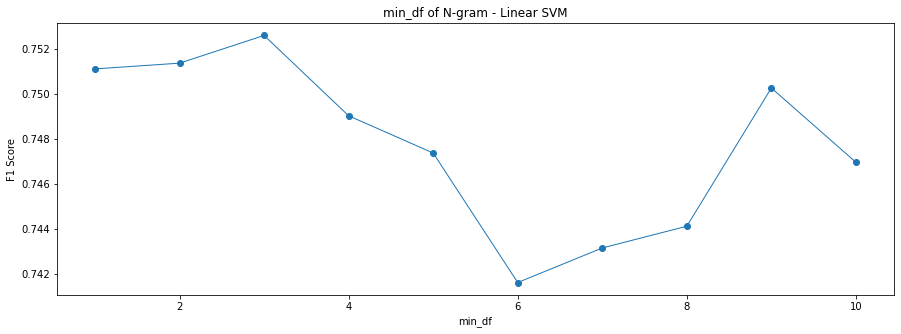

In [20]:
# i-3: Decide on an appropriate threshold M for N-gram Model

# 2.min_df of N-gram - Linear SVM

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))

for m in m_list:
    vectorizer = CountVectorizer(min_df=m,ngram_range=(1,2),binary=True) 
    train_ng_vectors = vectorizer.fit_transform(train_corpus) 
    train_ng_vectors = train_ng_vectors.toarray()
    test_corpus = test_pre
    test_ng_vectors = vectorizer.transform(test_corpus) 
    test_ng_vectors = test_ng_vectors.toarray()
    
    lsvm_model=LinearSVC(C=0.1)
    lsvm_model.fit(train_ng_vectors,y_train)
    predict_lsvm=lsvm_model.predict(test_ng_vectors)
    
    f1 = f1_score(y_test,predict_lsvm)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=3
#plot
a2 = m_list
b2 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a2,b2,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of N-gram - Linear SVM") 
plt.show() 

[0.660427807486631, 0.723114956736712, 0.7282809611829946, 0.7299448867115738, 0.7319461444308445, 0.7319461444308445, 0.7223587223587224, 0.7155172413793105, 0.7183271832718328, 0.715248009797918]
Max F1 Score = 0.7319461444308445
best threshold M = 5


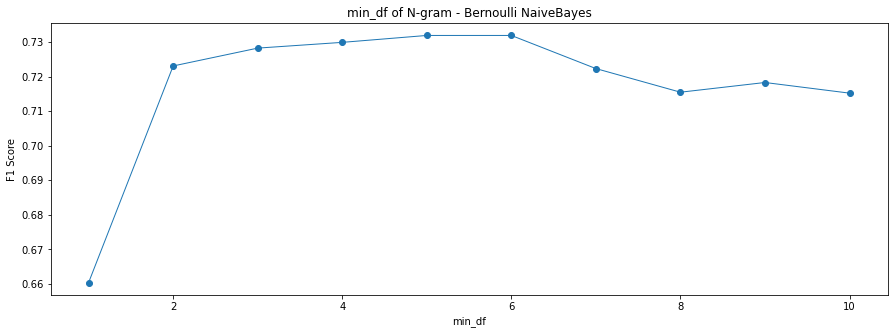

In [21]:
# i-3: Decide on an appropriate threshold M for N-gram Model

# 3.min_df of N-gram - Bernoulli NaiveBayes

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))

for m in m_list:
    vectorizer = CountVectorizer(min_df=m,ngram_range=(1,2),binary=True) 
    train_ng_vectors = vectorizer.fit_transform(train_corpus) 
    train_ng_vectors = train_ng_vectors.toarray()
    test_corpus = test_pre
    test_ng_vectors = vectorizer.transform(test_corpus) 
    test_ng_vectors = test_ng_vectors.toarray()
            
    BernoulliNB = Bernoulli_NaiveBayes()
    BernoulliNB.train(train_ng_vectors,y_train)
    y_pred = BernoulliNB.predict(test_ng_vectors)
    
    f1 = BernoulliNB.cal_f1_score(y_test,y_pred)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=5
#plot
a2 = m_list
b2 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a2,b2,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of N-gram - Bernoulli NaiveBayes") 
plt.show() 

[0.6972361809045227, 0.7419165196942975, 0.7555040556199305, 0.7488372093023256, 0.751015670342426, 0.7524637681159421, 0.7501442585112522, 0.7487001733102254, 0.7385507246376811, 0.7412993039443155]
Max F1 Score = 0.7555040556199305
best threshold M = 3


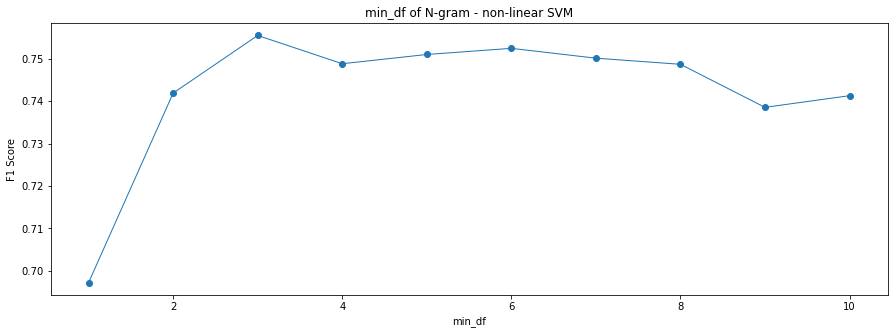

In [22]:
# i-3: Decide on an appropriate threshold M for N-gram Model

# 4.min_df of N-gram - non-linear SVM

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_score_list = []
m_list = list(range(1,11))

for m in m_list:
    vectorizer = CountVectorizer(min_df=m,ngram_range=(1,2),binary=True) 
    train_ng_vectors = vectorizer.fit_transform(train_corpus) 
    train_ng_vectors = train_ng_vectors.toarray()
    test_corpus = test_pre
    test_ng_vectors = vectorizer.transform(test_corpus) 
    test_ng_vectors = test_ng_vectors.toarray()
        
    SVM=SVC(C=1,kernel='rbf',gamma=0.1)
    SVM.fit(train_ng_vectors,y_train)
    predict_svm=SVM.predict(test_ng_vectors)
    
    f1 = f1_score(y_test,predict_svm)
    f1_score_list.append(f1)
    
print(f1_score_list)
max_f1 = max(f1_score_list)
print ('Max F1 Score =', max_f1)
print ('best threshold M =',f1_score_list.index(max_f1) + 1)

#best threshold M=3
#plot
a4 = m_list
b4 = f1_score_list
plt.figure(figsize=(15,5)) 
plt.plot(a4,b4,'o-',linewidth=1)   
plt.xlabel("min_df") 
plt.ylabel("F1 Score")  
plt.title("min_df of N-gram - non-linear SVM") 
plt.show() 

### Question l: Reflecting on interpretability.

Description: Suppose that you were constructing a model for this task as part of a consulting job, where you not only cared about classification performance, but wanted an interpetable model, such that you could explain to your clients how it made its decisions, and they could trust the model.  

l-1: Would you still choose the same approach, or a different one? Discuss why or why not, which approach you think would be best in this setting.

answer: 

Theoretically speaking, among the four models, Bernoulli Naive Bayes model has the best interpretability, Logistic Regression model has the second-best interpretability, Linear SVM model has the third-best interpretability, and Non-linear SVM model has the worst interpretability.

First, Naive Bayes and logistic regression are both linear models, in which feature weights correspond directly to the importance of features, so it is easy to understand what the model has learned. Both models are based on conditional probabilities, so they both have good interpretability for the final results of different classes.

Second, Naive Bayes model is derived from the total probability formula, and each step has the probability deduction. It realizes classification by calculating the probability of features. Because constraints of Naive Bayes are stricter than logistic regression, the relevant parameters of Naive Bayes are more clear (i.e. have fixed forms). It directly counts the logical occurrence ratio of each feature as a weight. However, the parameters obtained by logistic regression do not have clear forms (because it does not have such strict constraints as Naive Bayes). It can obtain the weight of each feature through optimization methods such as gradient descent method to see which features are more important.

Third, SVM model has a theoretical derivation process, but its interpretability is not very strong. It's not as intuitive as Naive Bayes, logistic regression and decision tree. Relatively speaking, if using a linear kernel, its interpretability is slightly better, similar to linear regression; if using a nonlinear kernel, such as RBF, its interpretability is very poor.

In conclusion, interpretability is an essential characteristic of a reliable system and an important influence factor in clients' trust in the model/technique. **Given that the Bernoulli Naive Bayes model has not only the best performance but also the best interpretability among the four models used for this task, I would choose Bernoulli Naive Bayes model as our best approach.**